# Data Preprocessing
## Content
- Data Preprocessing
- Load data from postgres
- Data Information
- Data Manipulation
    - Missing Value Manipulation
    - Fixing missing values
    - Droping Duplicate values
- Show Data Description
- Outliers
    - Fix Outliers
- Data wrangling
- Save Cleaned Data

# Data Preprocessing

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preProcessing import data_preProcessing_script
from data_manipulator import DataCleaner
from data_exploration import exploration

# Load Data From Postgres

In [3]:
# importing postgres module
import psycopg2 as pg

In [4]:
# connect postgres engine to python
# engine = pg.connect("dbname='postgres' user='postgres' host='127.0.0.1' port='5432' password='abel6464'")
# df = pd.read_sql('select * from merged LIMIT 100000', con=engine)
df = pd.read_csv("../data/output_data.csv")
df.head(10)

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
0,44,01jan2019,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10
1,44,02jan2019,7.05,6.05,7.11,24.31000,36.14,0.557082,24.31
2,44,03jan2019,7.05,5.98,7.28,30.78391,34.34,0.579922,28.77
3,44,04jan2019,7.05,5.98,7.28,20.16950,36.32,0.542767,18.85
4,44,05jan2019,6.79,6.07,6.68,1.23120,44.06,0.494757,1.71
5,44,06jan2019,6.79,5.96,6.68,1.57700,44.24,0.456290,1.90
6,44,07jan2019,7.10,5.96,7.07,14.11320,42.80,0.693379,12.38
7,44,08jan2019,7.10,6.03,7.07,19.44189,41.54,0.567908,18.17
8,44,09jan2019,7.10,5.99,7.07,26.62890,35.78,0.559945,23.99
9,44,10jan2019,7.10,5.99,7.29,31.77930,33.80,0.542755,28.63


# Data Information

In [5]:
# object creation for data preprocessing module
preprocess = data_preProcessing_script(df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19710 entries, 0 to 19709
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mkt_id              19710 non-null  int64  
 1   output_date         19710 non-null  object 
 2   output_own_price    19710 non-null  float64
 3   output_own_cost     19710 non-null  float64
 4   output_comp_price   19710 non-null  float64
 5   output_own_profits  19710 non-null  float64
 6   output_X            19710 non-null  float64
 7   output_own_share    19710 non-null  float64
 8   output_own_sales    19710 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
# count unique columns
print('unique column values')
df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(33)

unique column values


output_own_share      19635
output_own_profits    14713
output_own_sales       2854
output_X                381
output_date             365
output_comp_price        95
output_own_price         94
mkt_id                   54
output_own_cost          42
dtype: int64

In [7]:
# display shape of the dataframe
df.shape

(19710, 9)

# Data Manipulation
## Missing Value Manipulation

In [8]:
# missing value columns
preprocess.colums_WithMissingValue()

[]

In [9]:
# get missing value columns based percentage
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
mkt_id,0,0.0 %
output_date,0,0.0 %
output_own_price,0,0.0 %
output_own_cost,0,0.0 %
output_comp_price,0,0.0 %
output_own_profits,0,0.0 %
output_X,0,0.0 %
output_own_share,0,0.0 %
output_own_sales,0,0.0 %


Text(0, 0.5, 'Features')

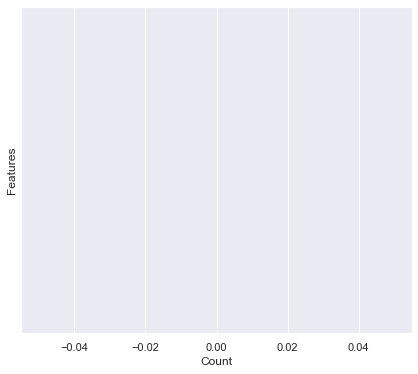

In [10]:
#cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
cols_with_missing = df.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features') 

# Droping Duplicate values

In [11]:
# Duplicate
df[df.duplicated()].index

Int64Index([], dtype='int64')

In [12]:
# drop duplicates
preprocess.drop_duplicates()

In [13]:
# Duplicate
df[df.duplicated()].index

Int64Index([], dtype='int64')

# Show Data Description

In [14]:
# display data description
preprocess.show_data_description()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
count,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000,19710.000000
mean,5229.240741,7.002018,5.999675,7.003128,8.477572,52.718559,0.499905,7.293428
std,3714.454255,0.202630,0.049680,0.200832,10.015517,14.910094,0.077973,7.854675
min,44.000000,6.560000,5.790000,6.560000,0.012600,24.620000,0.193445,0.020000
25%,2306.000000,6.780000,5.970000,6.790000,0.949400,39.740000,0.449883,1.060000
50%,5210.500000,7.040000,6.000000,7.040000,3.539900,51.440000,0.500003,3.800000
75%,7369.000000,7.150000,6.030000,7.150000,14.476825,64.940000,0.550166,12.490000
max,15555.000000,7.550000,6.230000,7.510000,53.029810,92.840000,0.800825,36.080000


In [15]:
# display datatypes
preprocess.show_datatypes()

mkt_id                  int64
output_date            object
output_own_price      float64
output_own_cost       float64
output_comp_price     float64
output_own_profits    float64
output_X              float64
output_own_share      float64
output_own_sales      float64
dtype: object

In [16]:
# describe dataset using background color gradient
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
mkt_id,19710.000000,5229.240741,3714.454255,44.000000,2306.000000,5210.500000,7369.000000,15555.000000
output_own_price,19710.000000,7.002018,0.202630,6.560000,6.780000,7.040000,7.150000,7.550000
output_own_cost,19710.000000,5.999675,0.049680,5.790000,5.970000,6.000000,6.030000,6.230000
output_comp_price,19710.000000,7.003128,0.200832,6.560000,6.790000,7.040000,7.150000,7.510000
output_own_profits,19710.000000,8.477572,10.015517,0.012600,0.949400,3.539900,14.476825,53.029810
output_X,19710.000000,52.718559,14.910094,24.620000,39.740000,51.440000,64.940000,92.840000
output_own_share,19710.000000,0.499905,0.077973,0.193445,0.449883,0.500003,0.550166,0.800825
output_own_sales,19710.000000,7.293428,7.854675,0.020000,1.060000,3.800000,12.490000,36.080000


# Outliers

In [19]:
# importing exploration modules
from data_exploration import exploration
exploration = exploration()

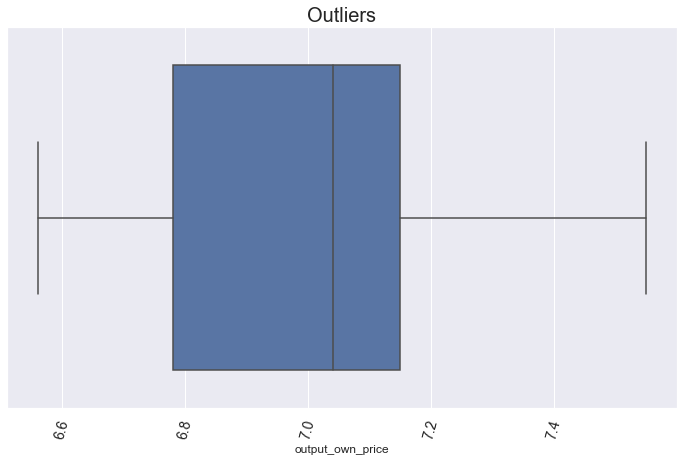

In [21]:
# box plot for volume agreed column
exploration.plot_box(df, "output_own_price", "Outliers")

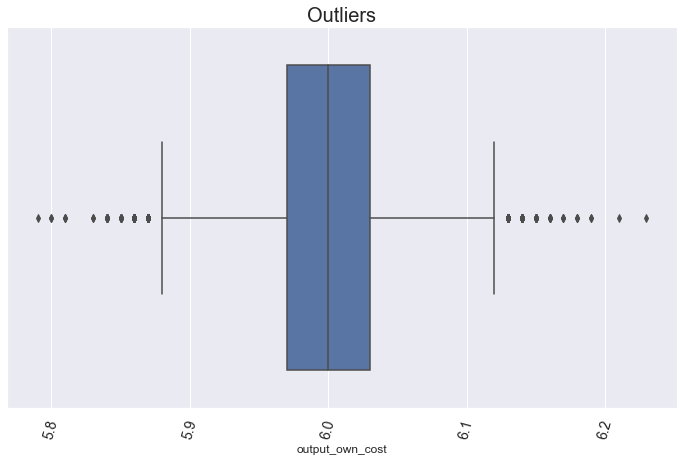

In [22]:
# box plot for volume agreed column
exploration.plot_box(df, "output_own_cost", "Outliers")

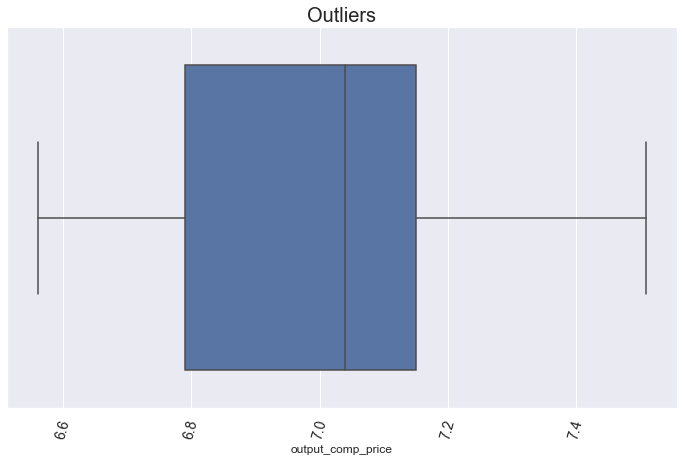

In [23]:
# box plot for volume agreed column
exploration.plot_box(df, "output_comp_price", "Outliers")

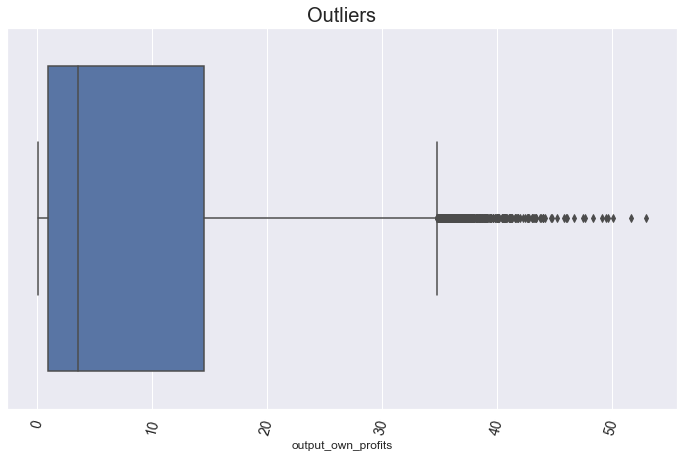

In [24]:
# box plot for volume agreed column
exploration.plot_box(df, "output_own_profits", "Outliers")

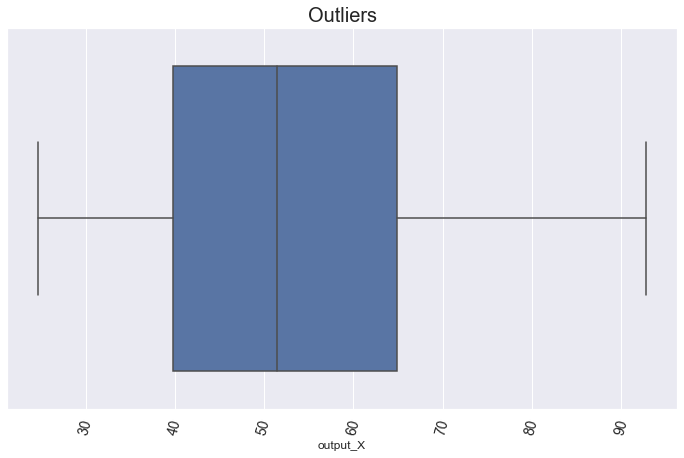

In [25]:
# box plot for volume agreed column
exploration.plot_box(df, "output_X", "Outliers")

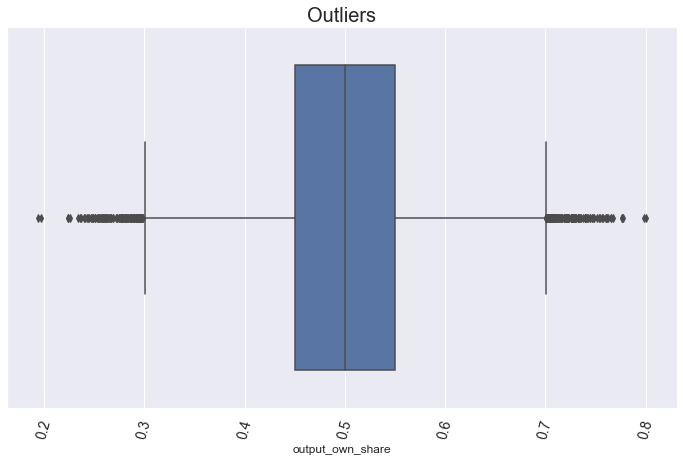

In [26]:
# box plot for volume agreed column
exploration.plot_box(df, "output_own_share", "Outliers")

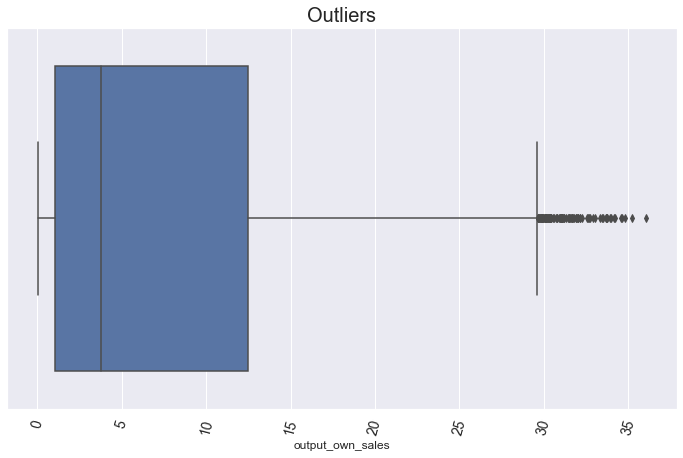

In [27]:
# box plot for volume agreed column
exploration.plot_box(df, "output_own_sales", "Outliers")

# Fix Outliers

In [28]:
# import modules used for data cleaning
from data_manipulator import DataCleaner
manipulator = DataCleaner(df)

In [29]:
df.columns

Index(['mkt_id', 'output_date', 'output_own_price', 'output_own_cost',
       'output_comp_price', 'output_own_profits', 'output_X',
       'output_own_share', 'output_own_sales'],
      dtype='object')

In [30]:
# numerical columns
columns = ['output_own_price', 'output_own_cost',
'output_comp_price', 'output_own_profits','output_X', 'output_own_share', 'output_own_sales']

In [31]:
# replace outlier with median
manipulator.replace_outlier_with_median(df, columns)

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
0,44,01jan2019,7.05,5.90,7.11,15.065000,42.80,0.515267,13.10
1,44,02jan2019,7.05,6.05,7.11,24.310000,36.14,0.557082,24.31
2,44,03jan2019,7.05,5.98,7.28,30.783910,34.34,0.579922,28.77
3,44,04jan2019,7.05,5.98,7.28,20.169500,36.32,0.542767,18.85
4,44,05jan2019,6.79,6.07,6.68,1.231200,44.06,0.494757,1.71
...,...,...,...,...,...,...,...,...,...
19705,15555,27dec2019,7.28,5.96,7.30,26.070000,36.68,0.515118,19.75
19706,15555,28dec2019,6.69,5.94,6.64,3.720000,34.34,0.497312,4.96
19707,15555,29dec2019,6.69,5.91,6.64,3.393001,32.00,0.424593,4.35
19708,15555,30dec2019,7.31,5.99,7.42,31.561200,31.10,0.465712,23.91


# Data Wrangling

In [33]:
df.head()

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
0,44,01jan2019,7.05,5.90,7.11,15.06500,42.80,0.515267,13.10
1,44,02jan2019,7.05,6.05,7.11,24.31000,36.14,0.557082,24.31
2,44,03jan2019,7.05,5.98,7.28,30.78391,34.34,0.579922,28.77
3,44,04jan2019,7.05,5.98,7.28,20.16950,36.32,0.542767,18.85
4,44,05jan2019,6.79,6.07,6.68,1.23120,44.06,0.494757,1.71


In [41]:
# no need ... I can use Label encoder for the date

# Saving new processed File

In [42]:
# saving new processed file
df.to_csv('../data/processed_incl_missing.csv', index=False)